Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste:
Genere datasets usando el código desarrollado en el punto a) de la práctica 0 (vamos a llamar a estos datos "diagonal", y a los descriptos en el punto b) "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.
También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.
Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.



In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt

In [3]:
def diagonal(d,n,C):
    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    
    center2 = np.ones(d)*-1
    mcov2   = np.eye(d)*C*np.sqrt(d)
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    class1 = np.ones(int(n/2))
    class2 = np.ones(int(n/2))*0
    
    clases = np.concatenate([class1,class2])
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)
    
    df['clases'] = clases.astype(int)

    return df

In [4]:
def paralelo(d,n,C):
    
    center1 = np.zeros(d)
    center1[0] = 1
    mcov1   = np.eye(d)*C
    
    
    center2 = np.zeros(d)
    center2[0] = -1
    mcov2   = np.eye(d)*C
    
    points1 = np.random.multivariate_normal(center1, mcov1, int(n/2))
    points2 = np.random.multivariate_normal(center2, mcov2, int(n/2))
    
    points = np.concatenate([points1,points2])
    df = pd.DataFrame(points)
    
    class1 = np.ones(int(n/2))
    class2 = np.ones(int(n/2))*0
    
    clases = np.concatenate([class1,class2])
    df['clases'] = clases.astype(int)


    return df

In [5]:
#  Genere un único conjunto de test con n = 10000.
d = 2
C = 0.78
testdiag = diagonal(d,10000,C)
testpara = paralelo(d,10000,C)

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

In [7]:
a = [[],[]]
#a = np.array(a)

In [8]:
a[0].append(1)
a

[[1], []]

In [9]:
# Genere 20 conjuntos de entrenamiento para 
# cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000.
# Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) 
# sobre los datos de entrenamiento y sobre el conjunto de test, como así también 
# el tamaño del árbol (atributo tree_.node_count).

N = [125, 250, 500, 1000, 2000, 4000]

error_training = [[],[],[],[],[],[]]
error_test = [[],[],[],[],[],[]]
size = [[],[],[],[],[],[]]

X_plot = []
y_plot = []
y_test = []

for i in range(20):
    
    k = 0
    for n in N:
        
        # ----------------------  diagonal   ---------------
        dtrain = diagonal(d,n,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k].append(1 - accuracy)
        
        
        test = testdiag.drop(['clases'],axis = 1).values
        
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k].append(1 - accuracy)
        size[k].append(clf.tree_.node_count)
                   
        if i==19:
            X_plot.append(test)
            y_plot.append(prediccion_test)
            #y_test.append(prediccion_test)
            
            
        
        k = k + 1
        
        

In [80]:
# En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases)
# para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.


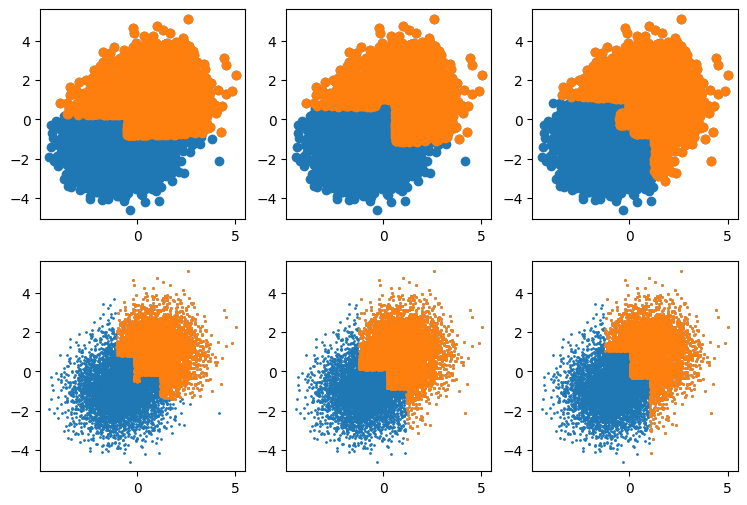

In [10]:
plt.figure(figsize=(9,6))

plt.subplot(231)
c1, = np.where(y_plot[0]==1)
plt.plot(X_plot[0][:,0],X_plot[0][:,1],ls='none',marker='o')
plt.plot(X_plot[0][c1,0],X_plot[0][c1,1],ls='none',marker='o')

plt.subplot(232)
c1, = np.where(y_plot[1]==1)
plt.plot(X_plot[1][:,0],X_plot[1][:,1],ls='none',marker='o')
plt.plot(X_plot[1][c1,0],X_plot[1][c1,1],ls='none',marker='o')

plt.subplot(233)
c1, = np.where(y_plot[2]==1)
plt.plot(X_plot[2][:,0],X_plot[2][:,1],ls='none',marker='o')
plt.plot(X_plot[2][c1,0],X_plot[2][c1,1],ls='none',marker='o')

plt.subplot(234)
c1, = np.where(y_plot[3]==1)
plt.plot(X_plot[3][:,0],X_plot[3][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[3][c1,0],X_plot[3][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(235)
c1, = np.where(y_plot[4]==1)
plt.plot(X_plot[4][:,0],X_plot[4][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[4][c1,0],X_plot[4][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(236)
c1, = np.where(y_plot[5]==1)
plt.plot(X_plot[5][:,0],X_plot[5][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[5][c1,0],X_plot[5][c1,1],ls='none',marker='o',markersize=1)


In [ ]:
# También genere dos gráficas: la primer gráfica tiene el training error y test error, 
# y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento 
# (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). 
# Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.



In [11]:
error_mean_training = []
for distribucion in error_training:
    error_mean_training.append(np.mean(distribucion))

error_mean_test = []
for distribucion in error_test:
    error_mean_test.append(np.mean(distribucion))    

Text(0, 0.5, 'error')

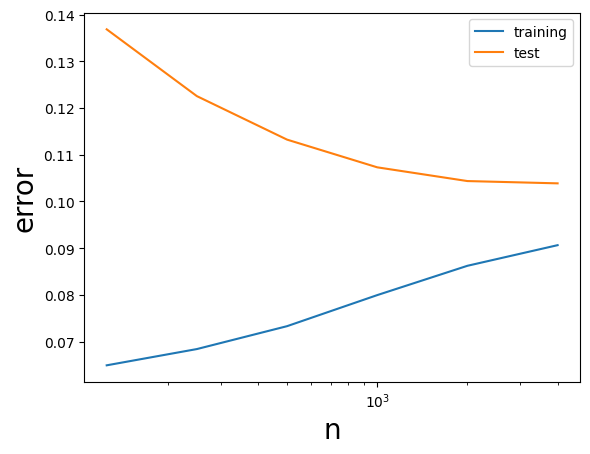

In [12]:
plt.plot(N,error_mean_training,label='training')
plt.plot(N,error_mean_test,label='test')
plt.semilogx()
plt.legend()
#plt.semilogy()
plt.xlabel('n',size=20)
plt.ylabel('error',size=20)

In [13]:
size_mean = []
for distribucion in size:
    size_mean.append(np.mean(distribucion))

Text(0, 0.5, 'size')

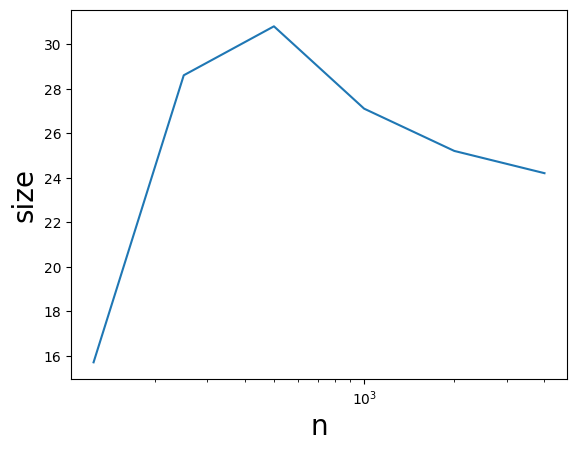

In [14]:
plt.plot(N,size_mean)
plt.semilogx()
plt.xlabel('n',size=20)
plt.ylabel('size',size=20)

# Paralelo

In [15]:
# Genere 20 conjuntos de entrenamiento para 
# cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000.
# Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) 
# sobre los datos de entrenamiento y sobre el conjunto de test, como así también 
# el tamaño del árbol (atributo tree_.node_count).

N = [125, 250, 500, 1000, 2000, 4000]

error_training = [[],[],[],[],[],[]]
error_test = [[],[],[],[],[],[]]
size = [[],[],[],[],[],[]]

X_plot = []
y_plot = []
y_test = []

for i in range(20):
    
    k = 0
    for n in N:
        
        # ----------------------  diagonal   ---------------
        dtrain = paralelo(d,n,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k].append(1 - accuracy)
        
        
        test = testpara.drop(['clases'],axis = 1).values
        
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k].append(1 - accuracy)
        size[k].append(clf.tree_.node_count)
                   
        if i==19:
            X_plot.append(test)
            y_plot.append(prediccion_test)
            #y_test.append(prediccion_test)
            
            
        
        k = k + 1

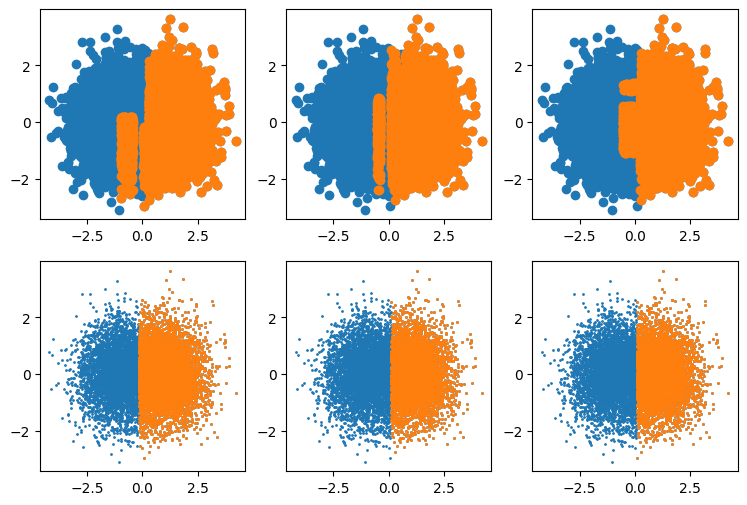

In [16]:
plt.figure(figsize=(9,6))

plt.subplot(231)
c1, = np.where(y_plot[0]==1)
plt.plot(X_plot[0][:,0],X_plot[0][:,1],ls='none',marker='o')
plt.plot(X_plot[0][c1,0],X_plot[0][c1,1],ls='none',marker='o')

plt.subplot(232)
c1, = np.where(y_plot[1]==1)
plt.plot(X_plot[1][:,0],X_plot[1][:,1],ls='none',marker='o')
plt.plot(X_plot[1][c1,0],X_plot[1][c1,1],ls='none',marker='o')

plt.subplot(233)
c1, = np.where(y_plot[2]==1)
plt.plot(X_plot[2][:,0],X_plot[2][:,1],ls='none',marker='o')
plt.plot(X_plot[2][c1,0],X_plot[2][c1,1],ls='none',marker='o')

plt.subplot(234)
c1, = np.where(y_plot[3]==1)
plt.plot(X_plot[3][:,0],X_plot[3][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[3][c1,0],X_plot[3][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(235)
c1, = np.where(y_plot[4]==1)
plt.plot(X_plot[4][:,0],X_plot[4][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[4][c1,0],X_plot[4][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(236)
c1, = np.where(y_plot[5]==1)
plt.plot(X_plot[5][:,0],X_plot[5][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[5][c1,0],X_plot[5][c1,1],ls='none',marker='o',markersize=1)


In [ ]:
# BIAS INDUCTIVO ? Al ganar informacion arriba del arbol, dividimos en dos rapidamente y nos queda ese corte feo. 
# Todo por querer hacer el arbol corto. 

In [17]:
error_mean_training = []
for distribucion in error_training:
    error_mean_training.append(np.mean(distribucion))

error_mean_test = []
for distribucion in error_test:
    error_mean_test.append(np.mean(distribucion)) 

Text(0, 0.5, 'error')

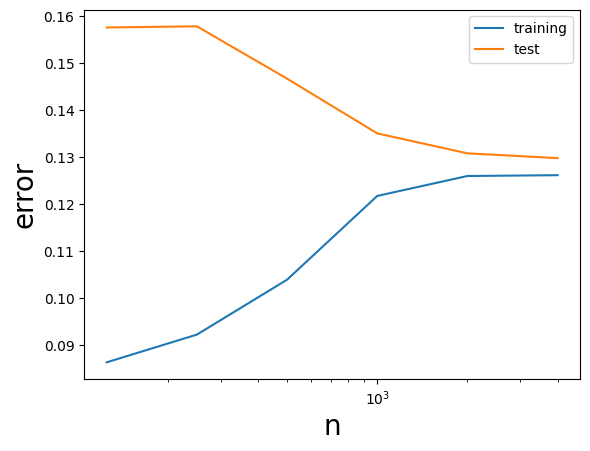

In [18]:
plt.plot(N,error_mean_training,label='training')
plt.plot(N,error_mean_test,label='test')
plt.semilogx()
plt.legend()
#plt.semilogy()
plt.xlabel('n',size=20)
plt.ylabel('error',size=20)